___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**WELCOME!**

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


**Determines**

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






**Tasks**
- 1. Import Modules, Load Data and Data Review
- 2. Data Pre-Processing
- 3. Implement Linear Regression 
- 4. Implement Ridge Regression
- 5. Implement Lasso Regression 
- 6. Implement Elastic-Net
- 7. Visually Compare Models Performance In a Graph

# 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

In [3]:
# !pip install skimpy
from skimpy import clean_columns

In [4]:
random_state=42

In [5]:
df_origin = pd.read_csv('./final_scout_not_dummy.csv')
df = df_origin
df.head()

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1220.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,66.000000,12.000000,Cloth,3.800000
1,Audi A1,Sedans,14500,80000.000000,Used,0,Metallic,4.000000,Automatic,1798.000000,1255.000000,front,Benzine,129.000000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000000,2.000000,141.000000,15.428571,Cloth,5.600000
2,Audi A1,Sedans,14640,83450.000000,Used,0,Metallic,4.000000,Automatic,1598.000000,1250.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,85.000000,12.000000,Cloth,3.800000
3,Audi A1,Sedans,14500,73000.000000,Used,0,Metallic,4.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000000,3.000000,66.000000,12.000000,Cloth,3.800000
4,Audi A1,Sedans,16790,16200.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),109.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.000000,3.000000,66.000000,12.000000,Cloth,4.100000


In [6]:
df.shape

(15901, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15901 entries, 0 to 15900
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15901 non-null  object 
 1   body_type            15901 non-null  object 
 2   price                15901 non-null  int64  
 3   km                   15901 non-null  float64
 4   type                 15901 non-null  object 
 5   inspection_new       15901 non-null  int64  
 6   paint_type           15901 non-null  object 
 7   nr_of_seats          15901 non-null  float64
 8   gearing_type         15901 non-null  object 
 9   displacement_cc      15901 non-null  float64
 10  weight_kg            15901 non-null  float64
 11  drive_chain          15901 non-null  object 
 12  fuel                 15901 non-null  object 
 13  co_2_emission        15901 non-null  float64
 14  emission_class       15901 non-null  object 
 15  comfort_convenience  15901 non-null 

In [8]:
df.describe(include='O').T

,count,unique,top,freq
make_model,15901,9,Audi A3,3095
body_type,15901,8,Sedans,8060
type,15901,5,Used,11086
paint_type,15901,3,Metallic,15338
gearing_type,15901,3,Manual,8146
drive_chain,15901,3,front,15693
fuel,15901,6,Benzine,8044
emission_class,15901,6,Euro 6,13599
comfort_convenience,15901,6188,"Air conditioning,Electrical side mirrors,Hill ...",249
entertainment_media,15901,346,"Bluetooth,Hands-free equipment,On-board comput...",1415


In [9]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
price,15901.000000,18021.503805,7376.733621,4950.000000,12850.000000,16900.000000,21900.000000,74600.000000
km,15901.000000,32282.685963,36950.231804,0.000000,3338.333333,20710.000000,47000.000000,317000.000000
inspection_new,15901.000000,0.649079,0.477273,0.000000,0.000000,1.000000,1.000000,1.000000
nr_of_seats,15901.000000,4.958619,0.496831,2.000000,5.000000,5.000000,5.000000,7.000000
displacement_cc,15901.000000,1427.812245,276.780543,890.000000,1229.000000,1461.000000,1598.000000,2480.000000
weight_kg,15901.000000,1342.742595,204.662353,840.000000,1165.000000,1280.000000,1441.000000,2471.000000
co_2_emission,15901.000000,116.933841,16.762399,80.000000,104.000000,116.000000,128.000000,165.000000
gears,15901.000000,5.890950,0.718441,5.000000,5.000000,6.000000,6.000000,8.000000
age,15901.000000,1.414471,1.112951,0.000000,0.000000,1.000000,2.000000,3.000000
hp_kw,15901.000000,88.497201,26.650065,51.000000,66.000000,85.000000,101.000000,294.000000


In [10]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
])

,skew,kurtosis
price,1.234726,2.964566
km,1.613081,2.797189
inspection_new,-0.624788,-1.609842
nr_of_seats,-0.228568,15.137954
displacement_cc,-0.094056,-0.270697
weight_kg,1.102362,1.338666
co_2_emission,0.378637,-0.574776
gears,0.401922,-0.252222
age,0.143790,-1.327600
hp_kw,1.296911,4.412700


In [11]:
stats.describe(df['price'])

DescribeResult(nobs=15901, minmax=(4950, 74600), mean=18021.50380479215, variance=54416198.91201382, skewness=1.2346092359996634, kurtosis=2.963256240790563)

## EDA and Graphical analysis

### Feature Engineering - Categoric/Object Column

In [12]:
df.select_dtypes("O").head()

,make_model,body_type,type,paint_type,gearing_type,drive_chain,fuel,emission_class,comfort_convenience,entertainment_media,extras,safety_security,upholstery_type
0,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
1,Audi A1,Sedans,Used,Metallic,Automatic,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Cloth
2,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
3,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Cloth
4,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Cloth


In [13]:
# df.nunique()
df.select_dtypes("O").nunique()

make_model                9
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
emission_class            6
comfort_convenience    6188
entertainment_media     346
extras                  658
safety_security        4436
upholstery_type           6
dtype: int64

In [14]:
df['make_model'].value_counts()

Audi A3           3095
Audi A1           2612
Opel Insignia     2594
Opel Astra        2525
Opel Corsa        2215
Renault Clio      1837
Renault Espace     988
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

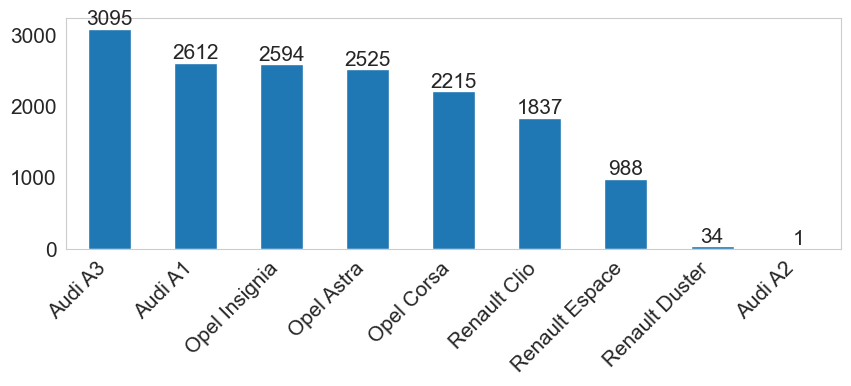

In [15]:
g = df.make_model.value_counts().plot.bar(figsize=(10,3))
g.bar_label(g.containers[0]);
plt.xticks(rotation=45, ha='right');

In [16]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
2612,Audi A2,Off-Road,28200,26166.000000,Employee's car,1,Metallic,5.000000,Manual,1598.000000,1734.000000,front,Diesel (Particulate Filter),120.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000000,1.000000,85.000000,12.000000,Cloth,4.900000


In [17]:
df.drop(index=df[df.make_model=="Audi A2"].index, inplace =True)

In [18]:
df.shape

(15900, 25)

### Feature Engineering - Numeric Column

In [19]:
numbers = df.select_dtypes("number").columns
df[numbers].describe().T

,count,mean,std,min,25%,50%,75%,max
price,15900.000000,18020.863648,7376.523902,4950.000000,12850.000000,16900.000000,21900.000000,74600.000000
km,15900.000000,32283.070660,36951.361972,0.000000,3337.916667,20710.000000,47000.000000,317000.000000
inspection_new,15900.000000,0.649057,0.477280,0.000000,0.000000,1.000000,1.000000,1.000000
nr_of_seats,15900.000000,4.958616,0.496846,2.000000,5.000000,5.000000,5.000000,7.000000
displacement_cc,15900.000000,1427.801541,276.785956,890.000000,1229.000000,1461.000000,1598.000000,2480.000000
weight_kg,15900.000000,1342.717987,204.645265,840.000000,1165.000000,1280.000000,1441.000000,2471.000000
co_2_emission,15900.000000,116.933648,16.762908,80.000000,104.000000,116.000000,128.000000,165.000000
gears,15900.000000,5.890943,0.718463,5.000000,5.000000,6.000000,6.000000,8.000000
age,15900.000000,1.414497,1.112981,0.000000,0.000000,1.000000,2.000000,3.000000
hp_kw,15900.000000,88.497421,26.650889,51.000000,66.000000,85.000000,101.500000,294.000000


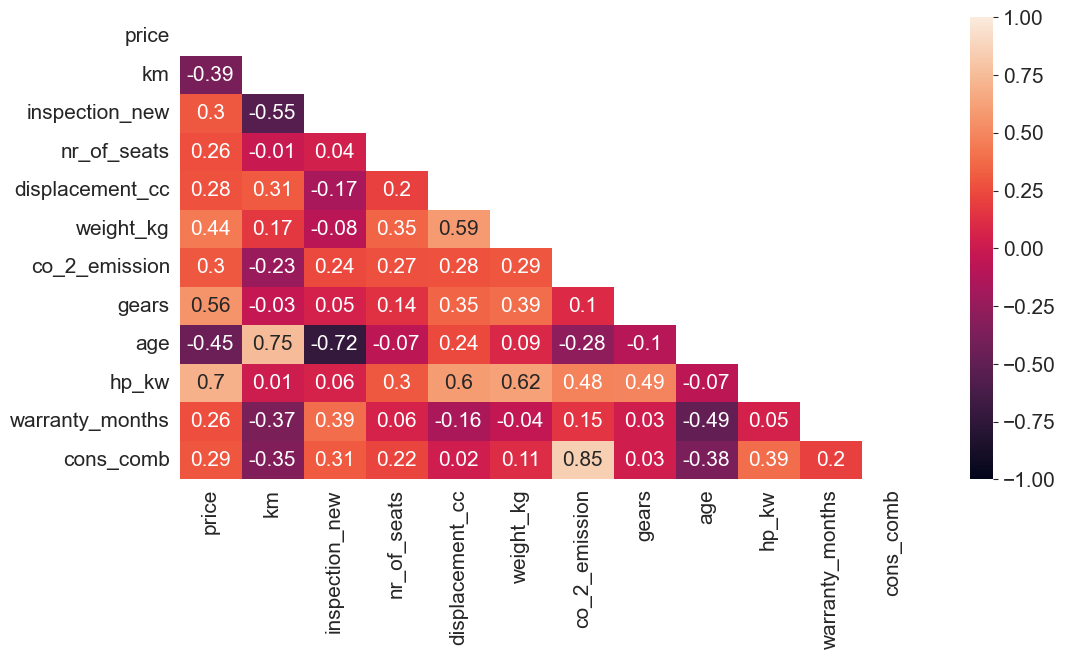

In [20]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

### `Multicolinarity` Check Colorized Correlation

In [21]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

In [22]:
def check_multicolinarity(data, upper=0.9):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val)>=upper and val<1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=upper and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df, upper=0.7)

Multicolinarity Data (5, 5)


,km,inspection_new,co_2_emission,age,cons_comb
km,nan,nan,nan,0.747368,nan
inspection_new,nan,nan,nan,-0.716184,nan
co_2_emission,nan,nan,nan,nan,0.852951
age,0.747368,-0.716184,nan,nan,nan
cons_comb,nan,nan,0.852951,nan,nan


### Check Target Feature

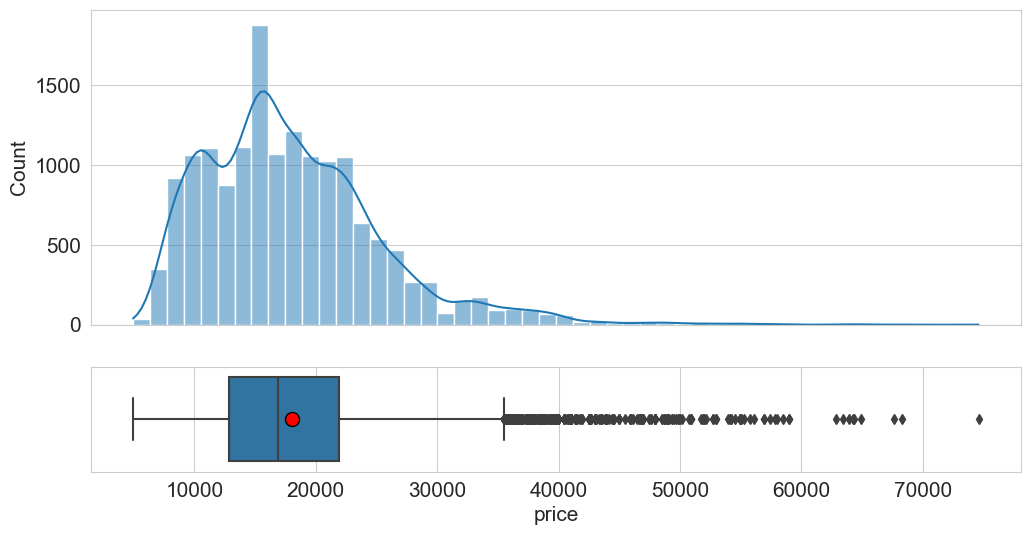

In [23]:
fig, (hist, box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(df['price'], bins=50, kde=True, ax=hist).grid(axis='y')
sns.boxplot(df.price, ax=box).grid(axis='x')

In [24]:
df.groupby('make_model')[['price']].describe().T

make_model       Audi A1      Audi A3   Opel Astra   Opel Corsa  \
price count  2612.000000  3095.000000  2525.000000  2215.000000   
      mean  18865.125191 20996.271082 15840.834059 11059.330023   
      std    4505.070786  5023.479072  4943.467724  2962.396111   
      min    8999.000000  5555.000000  6000.000000  4950.000000   
      25%   15550.000000 17900.000000 12399.000000  8690.000000   
      50%   17890.000000 20900.000000 15290.000000 10500.000000   
      75%   21900.000000 23500.000000 17990.000000 13495.000000   
      max   37900.000000 74600.000000 39433.000000 18622.000000   

make_model   Opel Insignia  Renault Clio  Renault Duster  Renault Espace  
price count    2594.000000   1837.000000       34.000000      988.000000  
      mean    21468.445644  11944.071856    13230.176471    30058.512146  
      std      7711.857823   4204.269365     1622.404678     8714.716619  
      min      8290.000000   5445.000000    10850.000000    12614.000000  
      25%     15622.250000   9150.000000    11925.000000    23900.000000  
      50%     19990.000000  10660.000000    13189.000000    28900.000000  
      75%     24450.000000  13995.000000    14399.000000    34956.250000  
      max     52120.000000  31500.000000    16033.000000    68320.000000

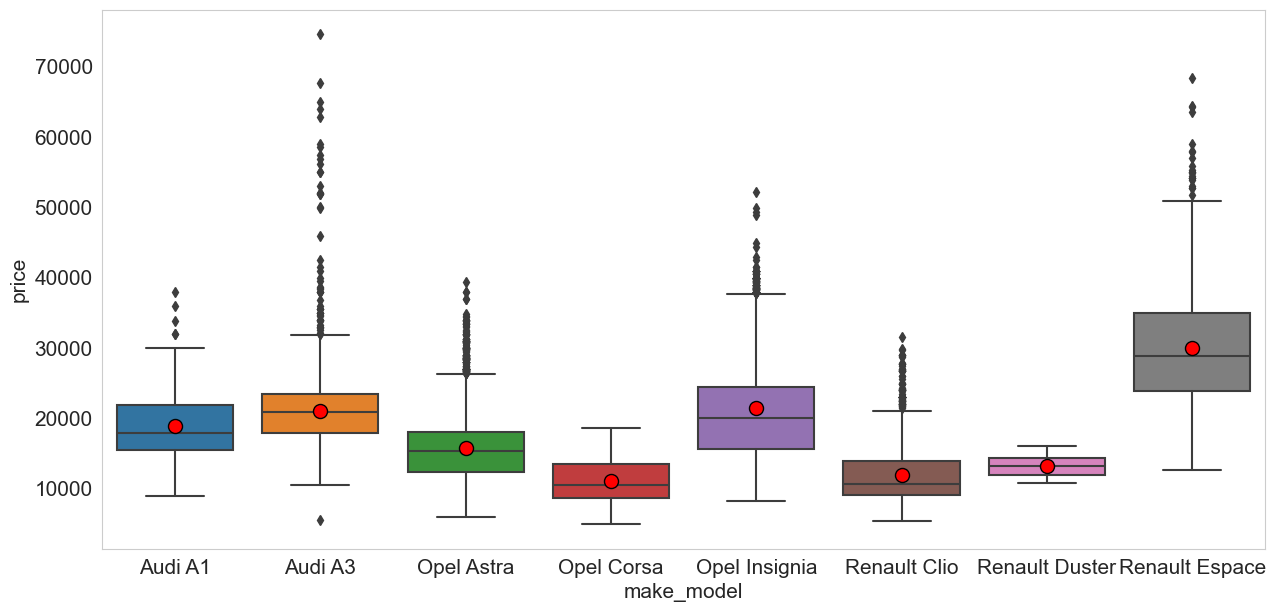

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

### Check Count Outliers

In [26]:
df[df["make_model"]== "Audi A1"]["price"].sort_values()

25      8999
61      9950
63     10000
62     10300
64     10490
       ...  
709    31990
706    32000
732    33900
731    35900
712    37900
Name: price, Length: 2612, dtype: int64

In [27]:
total_outliers = []

for model in df["make_model"].unique():
    
    car_prices = df[df["make_model"]==model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


# 2. Data Pre-Processing

## Import Libraries

In [28]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

# UnSupervised
from sklearn.cluster import KMeans
# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

In [29]:
# conda install -c districtdatalabs yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Supervised-Regression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

# Supervised-Classifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# UnSupervised-Cluster
from yellowbrick.cluster import KElbowVisualizer 

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [30]:
X = df.drop(columns='price')
y = df['price']

## Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

### `get_dummies` for X_train and X_test - for data separated by ','
- if data separated by ',', we will get dummy.

In [31]:
from sklearn.model_selection import train_test_split

def trans_1(X, y, test_size=0.2, random_state=random_state):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    X_test.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

In [32]:
from sklearn.model_selection import train_test_split

def trans_1_get_dummies(X, y, contain=',', test_size = 0.2, random_state=random_state):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    objects = X.select_dtypes(include="O").columns
    dummy_col = [col for col in objects if X[col].str.contains(contain, regex=True).any()]
    prefix = [i[0]+i.split('_')[1][0]+'_' if '_' in i else i[:2]+'_' for i in dummy_col]
    
    for col, pre in zip(dummy_col, prefix):
        X_train = X_train.join(X_train[col].str.get_dummies(sep=contain).add_prefix(pre))
        X_test = X_test.join(X_test[col].str.get_dummies(sep=contain).add_prefix(pre))
    
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # "0"
    
    X_train.drop(columns=dummy_col, inplace=True)
    X_test.drop(columns=dummy_col, inplace=True)
    
    return X_train, X_test, y_train, y_test

In [33]:
# check high nunique data separated by ','
X.select_dtypes(include ="O").nunique()

make_model                8
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
emission_class            6
comfort_convenience    6188
entertainment_media     346
extras                  658
safety_security        4436
upholstery_type           6
dtype: int64

In [34]:
# get_dummies apply for comma(',') separated data in columns
X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y, contain=',')

In [35]:
# get_dummies applied for comma(',') separated data in columns
X_train.select_dtypes('O').nunique()

make_model         8
body_type          8
type               5
paint_type         3
gearing_type       3
drive_chain        3
fuel               6
emission_class     6
upholstery_type    6
dtype: int64

### `OneHotEncoder` for X_train and X_test

In [36]:
from sklearn.preprocessing import OneHotEncoder

def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    return X_train, X_test

In [37]:
from sklearn.preprocessing import OneHotEncoder

def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [38]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [39]:
X_train.shape, X_test.shape

((12720, 152), (3180, 152))

In [40]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,12720.000000,0.165409,0.371564,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,12720.000000,0.194811,0.396071,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,12720.000000,0.158176,0.364920,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,12720.000000,0.136006,0.342809,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,12720.000000,0.164623,0.370854,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,12720.000000,0.879796,0.325213,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,12720.000000,0.703931,0.456540,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,12720.000000,0.726965,0.445536,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,12720.000000,0.136242,0.343059,0.000000,0.000000,0.000000,0.000000,1.000000


In [41]:
# X_test.describe().T

## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 

# Use train - calc mean and sd
scaler.fit(X_train)

# Use scaler calc scaled data
# if you don't use pipeline, you can use scaled data directly
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [43]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,12720.000000,0.165409,0.371564,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,12720.000000,0.194811,0.396071,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,12720.000000,0.158176,0.364920,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,12720.000000,0.136006,0.342809,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,12720.000000,0.164623,0.370854,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,12720.000000,0.879796,0.325213,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,12720.000000,0.703931,0.456540,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,12720.000000,0.726965,0.445536,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,12720.000000,0.136242,0.343059,0.000000,0.000000,0.000000,0.000000,1.000000


In [44]:
# check X_test_scaled
# pd.DataFrame(X_test_scaled, columns=X_test.columns).describe().T

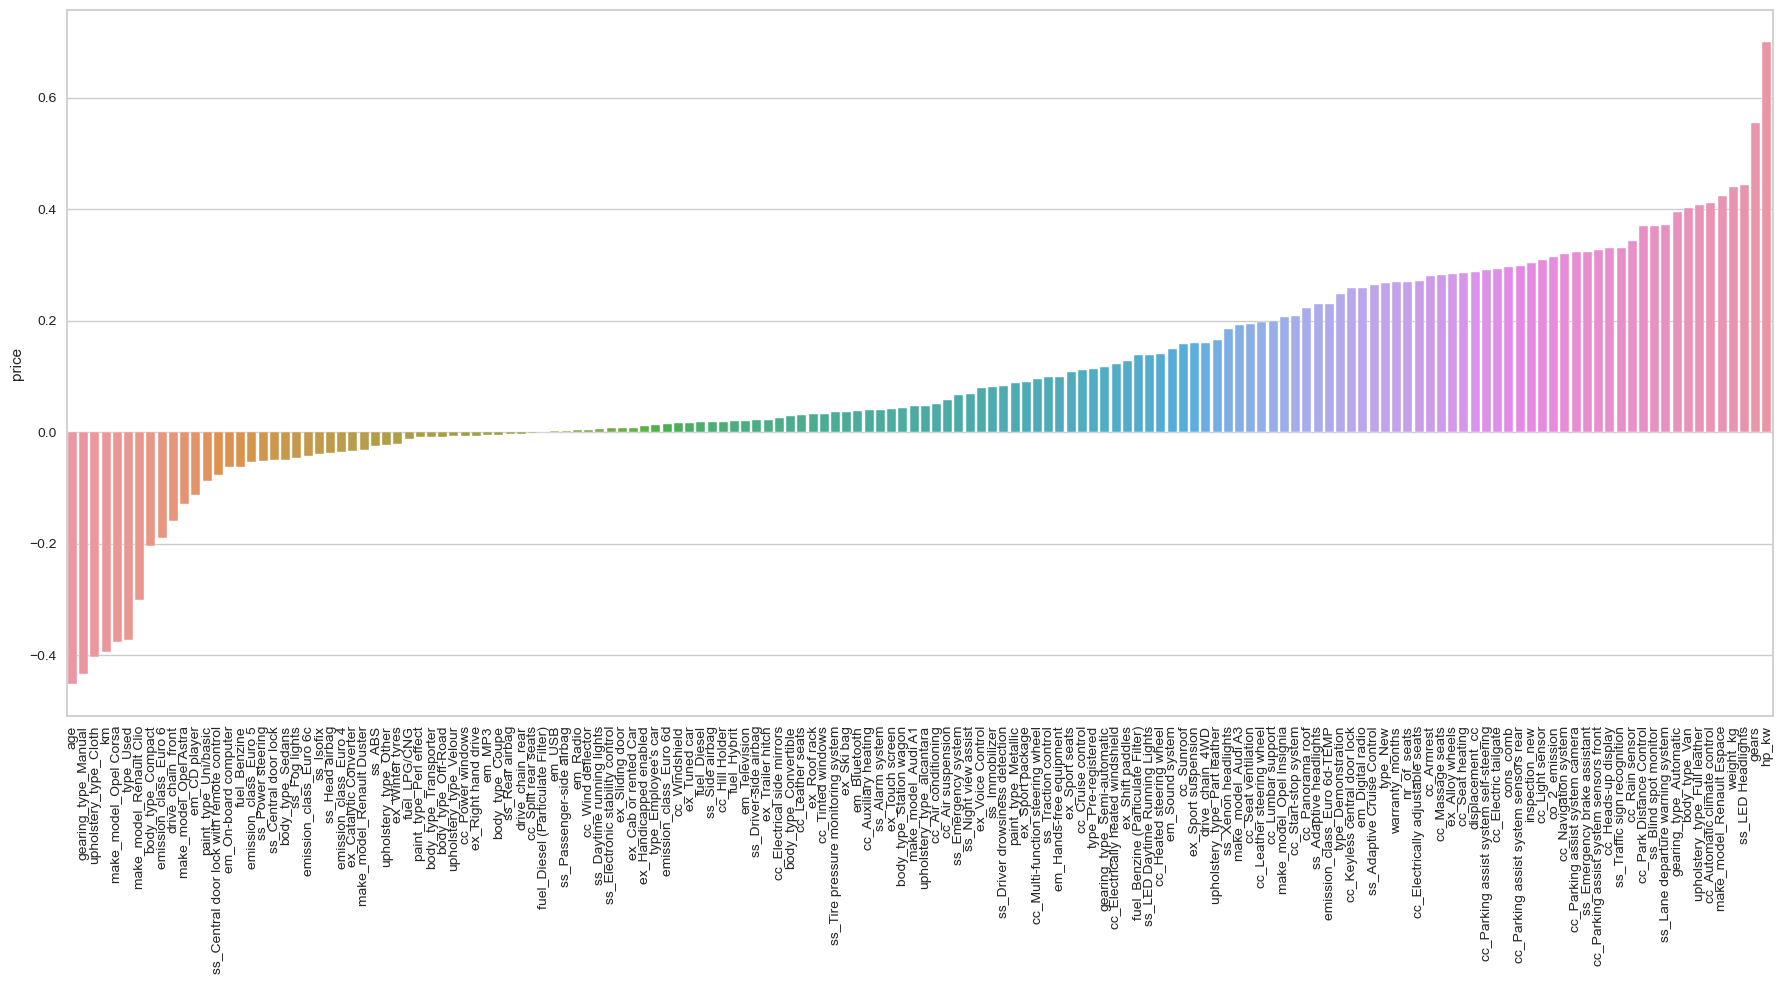

In [45]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

plt.figure(figsize=(18,10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)

plt.xticks(rotation=90)
plt.tight_layout();

# 3. Implement `Linear` Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# same train_val function
def eval_metric_regression(model, X_train, y_train, X_test, y_test, model_name=''):   
    y_pred_test = model.predict(X_test) 
    y_pred_train = model.predict(X_train)  
    
    train = pd.Series({
            "R2"   : r2_score(y_train, y_pred_train),
            "MAE"  : mean_absolute_error(y_train, y_pred_train),
            "MSE"  : mean_squared_error(y_train, y_pred_train),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_pred_train))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred_test),
            "MAE"  : mean_absolute_error(y_test, y_pred_test),
            "MSE"  : mean_squared_error(y_test, y_pred_test),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_test))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
#     # join (left join by default)
#     scores2 = train.join(test)
#     # concat (outer join by default)
#     scores3 = pd.concat([train, test], axis=1)
#     # append not recommended - use concat
#     scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

## Linear Model Fitting and Predicting `without Scale and without Pipeline`
- Can use Scaled `X_train_scaled, X_test_scaled` or not Scaled `X_train, X_test` Datas

In [47]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() 

lin_model.fit(X_train, y_train)

LinearRegression()

### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [48]:
# Evaluate the result. Overfitting?
ls = eval_metric_regression(lin_model, X_train, y_train, X_test, y_test, "linear")
ls

0            linear               
       linear_train    linear_test
R2         0.891599       0.886070
MAE     1715.225812    1712.294799
MSE  5943719.371962 5998201.127505
RMSE    2437.974440    2449.122522

### Adjusted R2 Score

In [49]:
def adj_r2(y_test, y_pred_test, X):
    r2 = r2_score(y_test, y_pred_test)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [50]:
y_pred_adj = lin_model.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.8858977534720704

### Cross Validate Model

In [51]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

In [52]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 6
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.082793,0.019945,0.891352,-1758.104730,-6416712.085850,-2533.122991
1,0.092509,0.016432,0.883267,-1743.425004,-6240973.102403,-2498.193968
2,0.094700,0.012338,0.884160,-1714.105833,-5880862.497045,-2425.048968
3,0.098742,0.013338,0.887872,-1726.855308,-5836111.311377,-2415.804485
4,0.096133,0.006797,0.893806,-1774.390894,-6337048.634945,-2517.349526
5,0.085552,0.021572,0.884446,-1721.834815,-6231025.834164,-2496.202282


In [53]:
df_scores.iloc[:, 2:].mean()

test_r2                                   0.887484
test_neg_mean_absolute_error          -1739.786097
test_neg_mean_squared_error        -6157122.244297
test_neg_root_mean_squared_error      -2480.953703
dtype: float64

#### Train Residual Mean check percent - Cross Validation RMSE

In [54]:
def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])

In [55]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))), 
    df_scores['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.135286
CV RMSE percent(%),-0.137671


### Coefficient - Slope Calculate 

In [56]:
def get_coeff_intercept(coeff, intercept, model_name='', columns=X_train.columns):
    coefficients = pd.DataFrame(coeff, columns = [f'Coefficient_{model_name}'], index=columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [57]:
# Calc Slope
lm_df = get_coeff_intercept(
    lin_model.coef_, 
    lin_model.intercept_, 
    model_name='linear', 
    columns=X_train.columns
)
lm_df

,Coefficient_linear
make_model_Audi A1,3253.844322
make_model_Audi A3,4383.178518
make_model_Opel Astra,-920.324189
make_model_Opel Corsa,-2170.215274
make_model_Opel Insignia,1915.195145
...,...
ss_Tire pressure monitoring system,49.834110
ss_Traction control,181.058229
ss_Traffic sign recognition,-136.246824
ss_Xenon headlights,-351.347780


### **Result:________**

- R2 score is high but
- R2 and RMSE check cross validation not not suitable all time, because of dummy column count

## Calculate Residuals & Visually Compare Residuals

Why do we use the least squares error method to find the regression line that best fits the data?

In [58]:
y_pred_test = lin_model.predict(X_test)
y_pred_train = lin_model.predict(X_train)

In [59]:
def check_pred_data_describe(y_pred_test, y_pred_train):
    test = pd.DataFrame(y_pred_test, columns=['y_pred_test']).describe().T
    train = pd.DataFrame(y_pred_train, columns=['y_pred_train']).describe().T
    return pd.concat([test, train])

In [60]:
# pred data
check_pred_data_describe(y_pred_test, y_pred_train)

,count,mean,std,min,25%,50%,75%,max
y_pred_test,3180.000000,17801.007200,6957.657054,-2384.463640,12999.171026,17254.469419,22126.898550,48880.254095
y_pred_train,12720.000000,18082.764308,6992.212670,193.894950,13293.134063,17600.265271,22416.951919,50862.718166


In [61]:
# actual data vs pred data cross check
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,3180.000000,17773.261006,7257.043865,5250.000000,12530.000000,16500.000000,21700.000000,68320.000000
price,12720.000000,18082.764308,7405.081006,4950.000000,12900.000000,16940.000000,21950.000000,74600.000000


In [62]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_test, "Residual":y_test-y_pred_test})
df_comparing

,Actual,Prediction,Residual
8002,16800,19278.654965,-2478.654965
10892,14500,13156.407870,1343.592130
9510,9750,8471.103197,1278.896803
3976,19900,22273.571048,-2373.571048
6308,8980,11074.916348,-2094.916348
...,...,...,...
12154,20960,21595.308366,-635.308366
9319,13990,12324.470141,1665.529859
1665,21790,21449.427083,340.572917
5293,24000,22793.577868,1206.422132


In [63]:
# check Residual
df_comparing.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,3180.000000,17773.261006,7257.043865,5250.000000,12530.000000,16500.000000,21700.000000,68320.000000
Prediction,3180.000000,17801.007200,6957.657054,-2384.463640,12999.171026,17254.469419,22126.898550,48880.254095
Residual,3180.000000,-27.746194,2449.350496,-16545.940536,-1380.455193,-104.651446,1145.927081,26895.011825


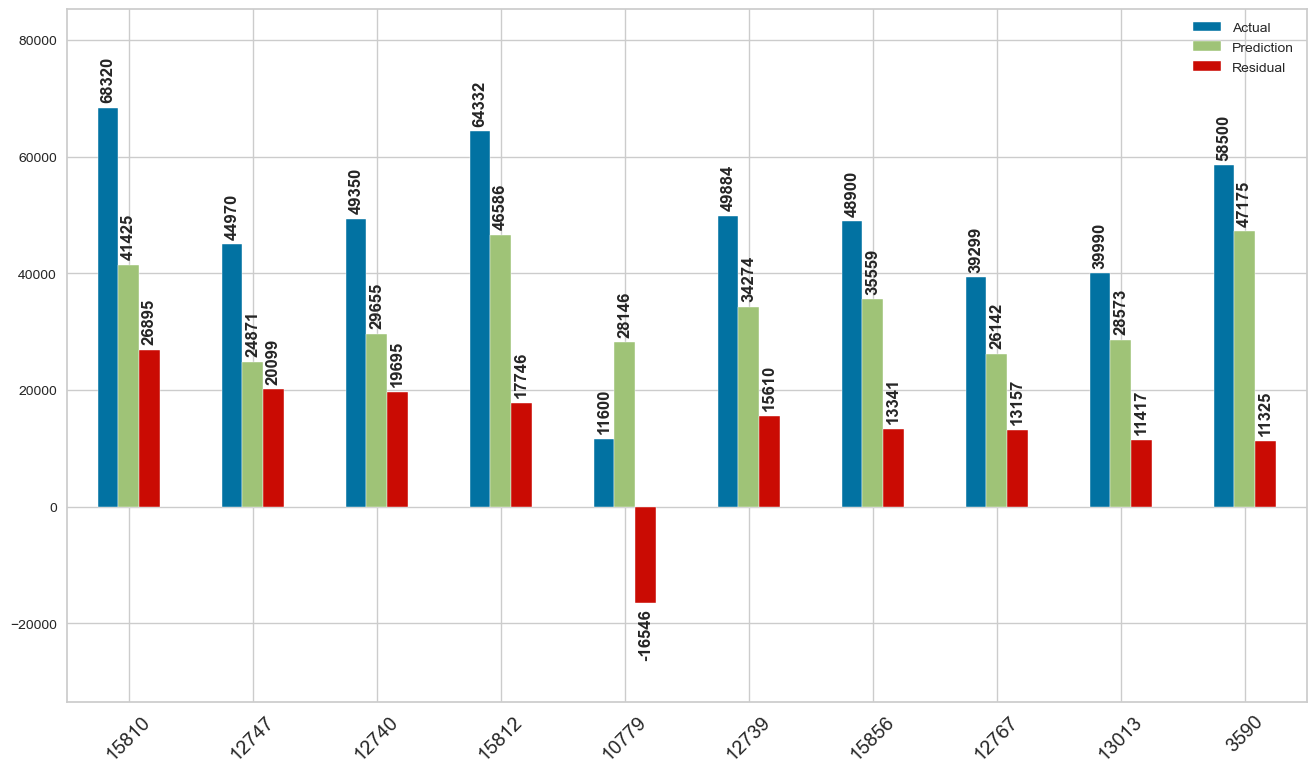

In [64]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.0f', fontsize=12, weight='bold', rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=45, labelsize=14)

### Check index datas have `most Residual-Error`

In [65]:
# indexes which datas have most error
index = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head().index

In [66]:
# check datas have most error
df.loc[index]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
15810,Renault Espace,Van,68320,4307.000000,Demonstration,1,Metallic,4.000000,Automatic,1598.000000,1734.000000,front,Diesel (Particulate Filter),120.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000000,0.000000,118.000000,24.000000,Full leather,6.500000
12747,Opel Insignia,Station wagon,44970,1698.000000,Used,1,Metallic,5.000000,Manual,1490.000000,1422.000000,front,Benzine,147.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio",Alloy wheels,"Adaptive Cruise Control,Daytime running lights...",6.000000,0.000000,121.000000,24.000000,Cloth,6.500000
12740,Opel Insignia,Sedans,49350,51.500000,New,1,Metallic,5.000000,Manual,1956.000000,1503.000000,front,Diesel (Particulate Filter),145.000000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000000,0.000000,125.000000,26.181818,Full leather,4.616667
15812,Renault Espace,Van,64332,1.000000,New,1,Metallic,7.000000,Automatic,1798.000000,1647.000000,front,Benzine,153.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",7.000000,0.000000,165.000000,41.600000,Full leather,7.600000
10779,Opel Insignia,Sedans,11600,68000.000000,Used,0,Metallic,5.000000,Automatic,1998.000000,1440.000000,front,Benzine,138.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,On-board computer","Alloy wheels,Roof rack,Ski bag","ABS,Central door lock with remote control,Driv...",6.000000,2.000000,191.000000,12.000000,Full leather,8.600000


### Check Residuals `Predicted Data` - ResidualsPlot

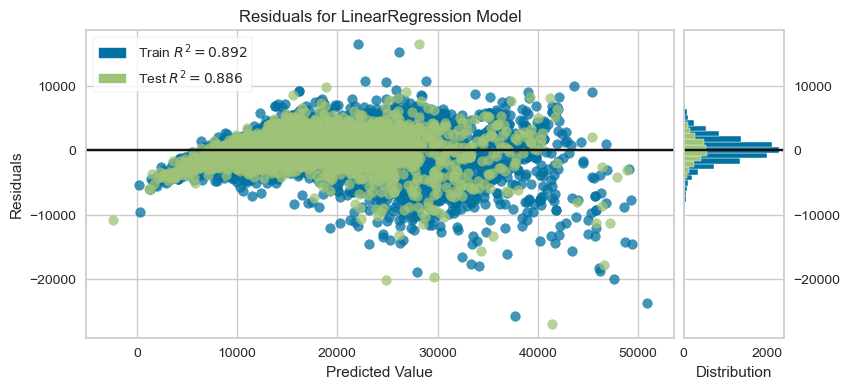

In [67]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(900, 400))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

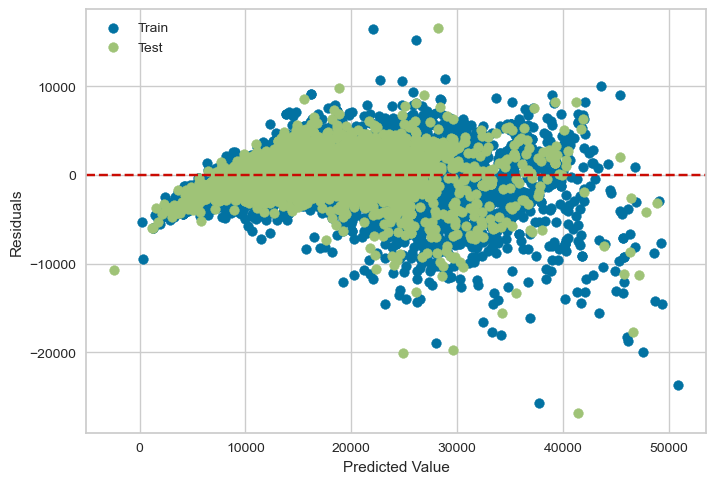

In [68]:
# Residuals scatterplot 
plt.scatter(x=y_pred_train, y=-(y_train-y_pred_train), c='b', label='Train') 
plt.scatter(x=y_pred_test, y=-(y_test-y_pred_test), c='g', label='Test') 

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

### Check Residuals `Actual Data` - Scatterplot

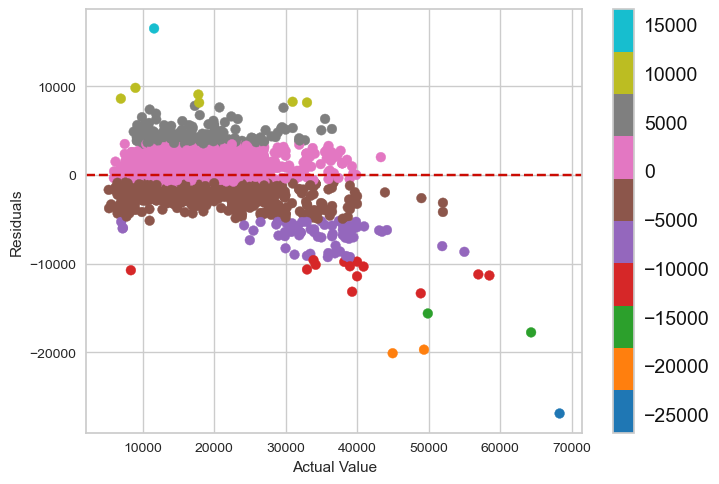

In [69]:
# Residuals scatterplot
plt.scatter(x=y_test, y=-(y_test-y_pred_test), c=-(y_test-y_pred_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Actual Value')
plt.ylabel('Residuals')

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - PredictionError

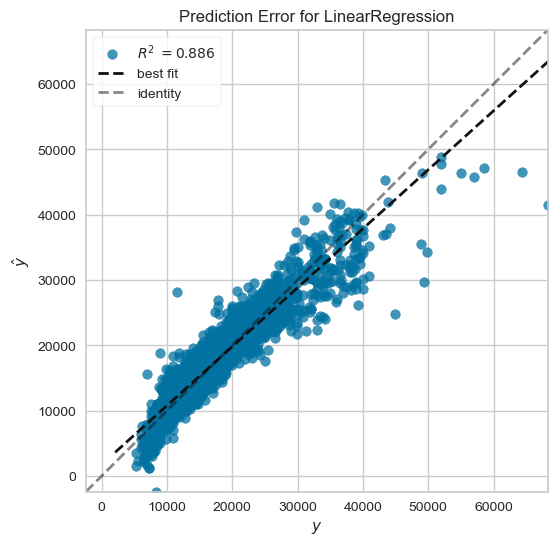

In [70]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(600, 600))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

### Check Residuals - Probplot
- https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html
- https://docs.scipy.org/doc/scipy/tutorial/stats/discrete.html


- Quantiles  : Range from any value to any other value.
- Percentiles: Range from 0 to 100.
- Quartiles  : Range from 0 to 4.

In [71]:
# stats.probplot((y_test-y_pred_test), dist=stats.loggamma, sparams=(2.5,), plot=plt);
# plt.title("Probability Plot for loggamma dist with shape parameter 2.5");

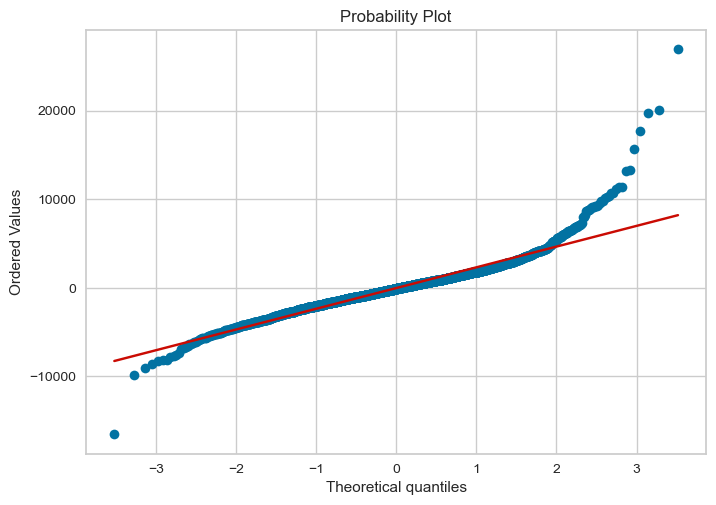

In [72]:
stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);

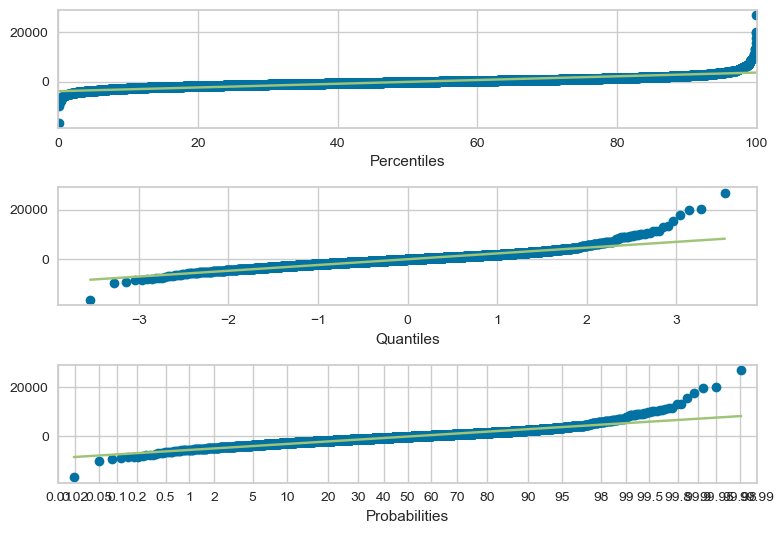

In [73]:
# conda install -c conda-forge mpl-probscale
import probscale

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)

sample = (y_test-y_pred_test)

probscale.probplot(sample, ax=ax1, plottype='pp', bestfit=True, problabel='Percentiles')
probscale.probplot(sample, ax=ax2, plottype='qq', bestfit=True, problabel='Quantiles')
probscale.probplot(sample, ax=ax3, plottype='prob', bestfit=True, problabel='Probabilities')

# ax3.set_xlim(left=0.5, right=99.5)
fig.tight_layout()

In [74]:
# stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test), plottype='qq', bestfit=True, 
#     problabel='Theoretical Quantiles', probax='x',
#     datalabel='Observed values',
# );

In [75]:
# # stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test), plottype='pp', bestfit=True, 
#     line_kws=dict(linestyle='--', lw=2, color='k'), 
#     scatter_kws=dict(marker='s', alpha=0.5),
#     problabel='Theoretical Percentiles', probax='x',
#     datalabel='Observed values',
# );

In [76]:
# probscale.probplot(
#     (y_test-y_pred_test), plottype='prob', bestfit=True,  
#     line_kws=dict(linestyle='--', linewidth=2),
#     scatter_kws=dict(marker='o', alpha=0.5),
#     problabel='Non-exceedance probability', probax='x',
#     datalabel='Observed values',
# );

## `Dropping outliers` that worsen my predictions from the dataset - `with Scale and without Pipeline`

<AxesSubplot:title={'center':'price'}, xlabel='[make_model]'>

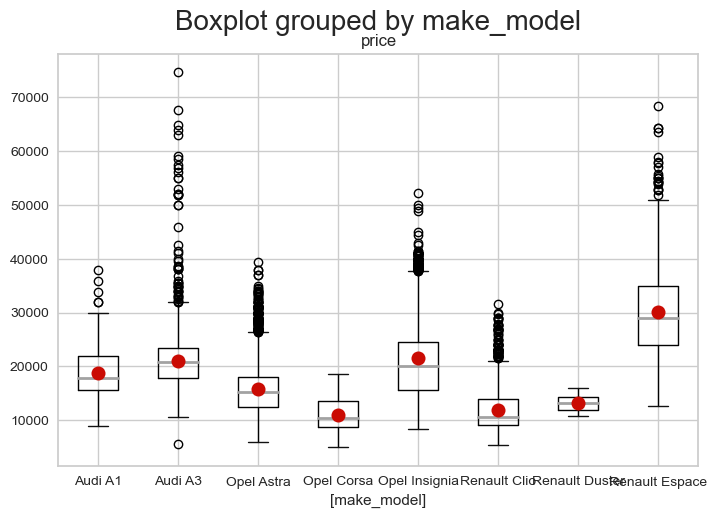

In [77]:
df[['make_model', 'price']].boxplot(by='make_model', whis=1.5)

In [78]:
df1 = df.copy()

for model in df["make_model"].unique():    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)    
    IQR = Q3-Q1    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df[df["make_model"]==model][(car_prices<lower_lim) | (car_prices>upper_lim)].index
    df.drop(index = drop_index, inplace=True)
    
df1.shape, df.shape

((15900, 25), (15481, 25))

In [79]:
X = df.drop(columns="price")
y = df['price']

X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y)
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [80]:
# if you don't use pipeline, you can use scaled data directly
scaler = MinMaxScaler() 

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

lin_model2 = LinearRegression()
lin_model2.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
ls

0            linear               
       linear_train    linear_test
R2         0.891599       0.886070
MAE     1715.225812    1712.294799
MSE  5943719.371962 5998201.127505
RMSE    2437.974440    2449.122522

In [82]:
ls = eval_metric_regression(lin_model2, X_train_scaled, y_train, X_test_scaled, y_test, "linear")
ls

0            linear               
       linear_train    linear_test
R2         0.902355       0.896640
MAE     1506.249879    1546.557636
MSE  4461209.120357 4710739.457459
RMSE    2112.157456    2170.423797

In [83]:
y_pred_adj = lin_model2.predict(X_test_scaled)
adj_r2(y_test, y_pred_adj, X)

0.8964797334081174

### Calculate Residuals & Visually Compare Residuals

In [84]:
y_pred_test = lin_model2.predict(X_test_scaled)
y_pred_train = lin_model2.predict(X_train_scaled)

In [85]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_test, "Residual":y_test-y_pred_test})
df_comparing.head()

,Actual,Prediction,Residual
3051,15480,16705.500000,-1225.500000
15326,27950,25190.250000,2759.750000
13864,8800,6796.000000,2004.000000
5506,23800,22694.500000,1105.500000
4995,23900,25381.500000,-1481.500000


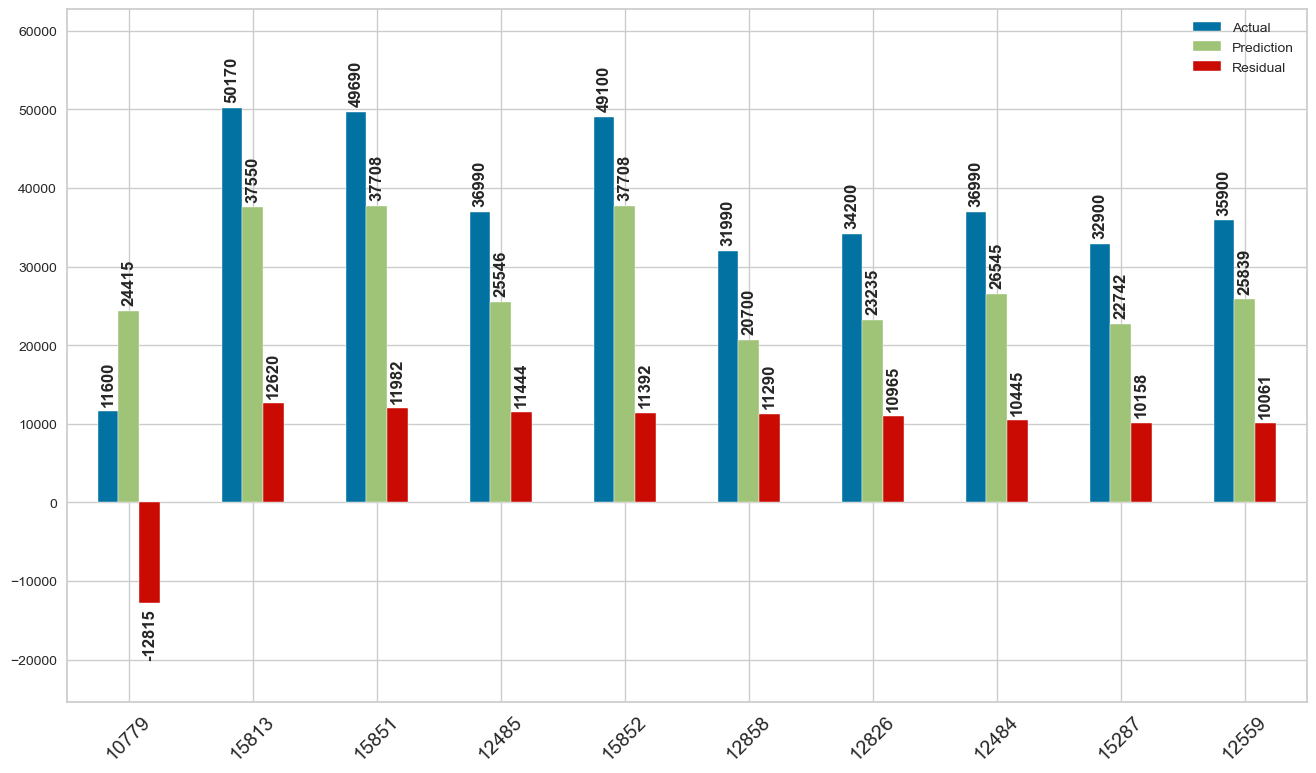

In [86]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.0f', fontsize=12, weight='bold', rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=45, labelsize=14)

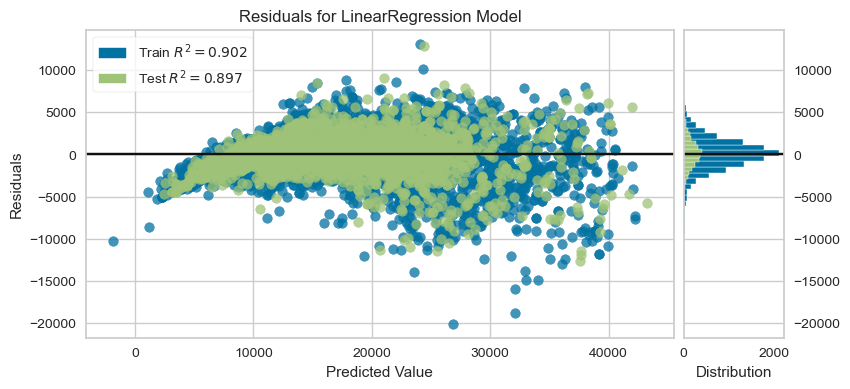

In [87]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(900, 400))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

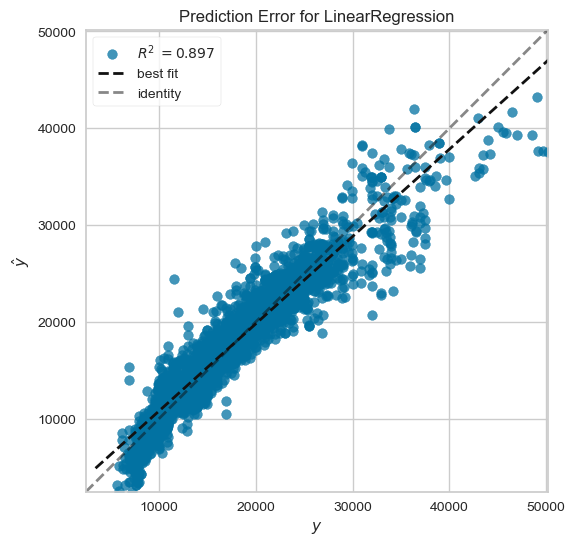

In [88]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(600, 600))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

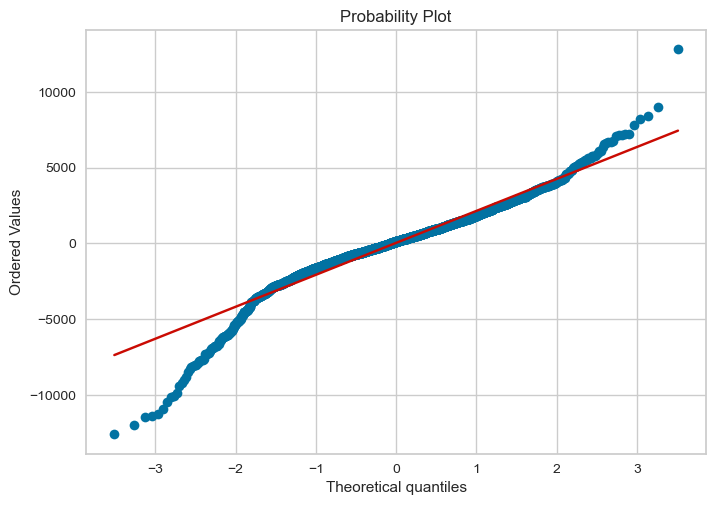

In [89]:
stats.probplot((y_pred_test-y_test), dist=stats.norm, plot=plt);

In [90]:
# Calc Slope
lm = get_coeff_intercept(
    lin_model2.coef_, 
    lin_model2.intercept_, 
    model_name='linear', 
    columns=X_train.columns
)
lm

,Coefficient_linear
make_model_Audi A1,2791802228408838.000000
make_model_Audi A3,2791802228410060.500000
make_model_Opel Astra,2791802228404814.000000
make_model_Opel Corsa,2791802228403013.000000
make_model_Opel Insignia,2791802228407992.500000
...,...
ss_Tire pressure monitoring system,-194.687500
ss_Traction control,110.921875
ss_Traffic sign recognition,-42.843750
ss_Xenon headlights,-264.125000


## **Result:________**

- We used not scaled data because of the dummy features
- When we delete outliers by car model, our minimum and maximum residuals are reduced and our scores were improved.

# 4. Implement `Ridge` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value. 

In [91]:
from sklearn.linear_model import Ridge

scaler = MinMaxScaler() 
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
# # pipeline for Ridge
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [92]:
rs = eval_metric_regression(pipe_ridge, X_train, y_train, X_test, y_test, "ridge")
rs

0             ridge               
        ridge_train     ridge_test
R2         0.902318       0.896665
MAE     1505.403290    1545.728690
MSE  4462898.067414 4709610.252464
RMSE    2112.557234    2170.163646

In [93]:
pd.concat([ls, rs], axis = 1)

0            linear                         ridge               
       linear_train    linear_test    ridge_train     ridge_test
R2         0.902355       0.896640       0.902318       0.896665
MAE     1506.249879    1546.557636    1505.403290    1545.728690
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464
RMSE    2112.157456    2170.423797    2112.557234    2170.163646

In [94]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state             42
solver                 auto
tol                0.001000
dtype: object

## Cross Validate Model

In [95]:
scaler = MinMaxScaler() 
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
) 
# pipeline for Cross Validate
model = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.077967,0.011585,0.905170,-1505.534684,-4466217.700755,-2113.342779
1,0.083918,0.013796,0.894718,-1558.418620,-4922545.585010,-2218.681046
2,0.092400,0.013216,0.895420,-1520.691499,-4505507.021125,-2122.617964
3,0.085000,0.017000,0.898394,-1510.719617,-4526514.773948,-2127.560757
4,0.099590,0.015999,0.898639,-1545.654266,-4745345.345028,-2178.381359


In [96]:
df_scores.iloc[:, 2:].mean()

test_r2                                   0.898468
test_neg_mean_absolute_error          -1528.203737
test_neg_mean_squared_error        -4633226.085173
test_neg_root_mean_squared_error      -2152.116781
dtype: float64

In [97]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}', 
    columns=X_train.columns
)
rm_df

,Coefficient_ridge_alpha_1
make_model_Audi A1,2512.431742
make_model_Audi A3,3741.959051
make_model_Opel Astra,-1502.619954
make_model_Opel Corsa,-3343.998641
make_model_Opel Insignia,1681.133876
...,...
ss_Tire pressure monitoring system,-193.683644
ss_Traction control,111.354128
ss_Traffic sign recognition,-40.478117
ss_Xenon headlights,-261.717387


In [98]:
pd.concat([lm_df, rm_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1
make_model_Audi A1,3253.844322,2512.431742
make_model_Audi A3,4383.178518,3741.959051
make_model_Opel Astra,-920.324189,-1502.619954
make_model_Opel Corsa,-2170.215274,-3343.998641
make_model_Opel Insignia,1915.195145,1681.133876
...,...,...
ss_Traction control,181.058229,111.354128
ss_Traffic sign recognition,-136.246824,-40.478117
ss_Xenon headlights,-351.347780,-261.717387
intercept,13831.979704,18710.185582


##  With Best Parameters (RidgeCV)

In [99]:
from sklearn.linear_model import RidgeCV

scaler = MinMaxScaler() 

# will be used in pipeline later
ridgecv_model = RidgeCV(
    alphas= np.linspace(0.94, 0.95, 3), 
    scoring= "neg_root_mean_squared_error", 
    cv = 10,
)
# pipeline for RidgeCV
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
])
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.94 , 0.945, 0.95 ]), cv=10,
                         scoring='neg_root_mean_squared_error'))])

In [100]:
pipe_ridgecv["ridgecv"].alpha_

0.945

In [101]:
rcs = eval_metric_regression(pipe_ridgecv, X_train, y_train, X_test, y_test, "ridge_cv")
rcs

0          ridge_cv               
     ridge_cv_train  ridge_cv_test
R2         0.902321       0.896666
MAE     1505.429209    1545.746849
MSE  4462750.993415 4709575.337411
RMSE    2112.522424    2170.155602

In [102]:
pd.concat([ls, rs, rcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                 
     ridge_cv_train  ridge_cv_test  
R2         0.902321       0.896666  
MAE     1505.429209    1545.746849  
MSE  4462750.993415 4709575.337411  
RMSE    2112.522424    2170.155602

In [103]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                          False
alphas                      [0.94, 0.945, 0.95]
cv                                           10
fit_intercept                              True
gcv_mode                                   None
normalize                            deprecated
scoring             neg_root_mean_squared_error
store_cv_values                           False
dtype: object

In [104]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}', 
    columns=X_train.columns
)
rcm_df

,Coefficient_ridgecv_alpha_0.945
make_model_Audi A1,2520.494972
make_model_Audi A3,3750.251784
make_model_Opel Astra,-1495.237946
make_model_Opel Corsa,-3334.103876
make_model_Opel Insignia,1688.287334
...,...
ss_Tire pressure monitoring system,-193.718621
ss_Traction control,111.295824
ss_Traffic sign recognition,-40.612442
ss_Xenon headlights,-261.820473


In [105]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.945
make_model_Audi A1,3253.844322,2512.431742,2520.494972
make_model_Audi A3,4383.178518,3741.959051,3750.251784
make_model_Opel Astra,-920.324189,-1502.619954,-1495.237946
make_model_Opel Corsa,-2170.215274,-3343.998641,-3334.103876
make_model_Opel Insignia,1915.195145,1681.133876,1688.287334
...,...,...,...
ss_Traction control,181.058229,111.354128,111.295824
ss_Traffic sign recognition,-136.246824,-40.478117,-40.612442
ss_Xenon headlights,-351.347780,-261.717387,-261.820473
intercept,13831.979704,18710.185582,18707.219357


## **Result:________**

- 

# 5. Implement `Lasso` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [106]:
from sklearn.linear_model import Lasso, LassoCV

scaler = MinMaxScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [107]:
lss = eval_metric_regression(pipe_lasso, X_train, y_train, X_test, y_test, "lasso")
lss

0             lasso               
        lasso_train     lasso_test
R2         0.902068       0.896491
MAE     1506.050252    1545.544592
MSE  4474327.385556 4717551.745292
RMSE    2115.260595    2171.992575

In [108]:
pd.concat([ls, rs, rcs, lss], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                         lasso                 
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  
R2         0.902321       0.896666       0.902068       0.896491  
MAE     1505.429209    1545.746849    1506.050252    1545.544592  
MSE  4462750.993415 4709575.337411 4474327.385556 4717551.745292  
RMSE    2112.522424    2170.155602    2115.260595    2171.992575

In [109]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Cross Validate Model

In [110]:
scaler = MinMaxScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline for Cross Validate
model = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=10
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.788511,0.011048,0.901443,-1523.322783,-4782925.156007,-2186.989976
1,0.823177,0.007781,0.907236,-1502.237934,-4218963.797409,-2054.011635
2,0.814038,0.011953,0.890613,-1605.549396,-5438846.482283,-2332.133462
3,0.845969,0.007967,0.900004,-1505.748931,-4368965.336342,-2090.207008
4,0.844702,0.010279,0.902693,-1473.922829,-4165445.053267,-2040.942197
5,1.004331,0.008830,0.892906,-1543.832178,-4643310.207464,-2154.834148
6,0.812464,0.010209,0.902259,-1458.980027,-4023985.033830,-2005.987297
7,0.781024,0.017862,0.895587,-1562.457938,-5005825.882747,-2237.370305
8,0.803540,0.036081,0.896989,-1579.137425,-5182287.023070,-2276.463710
9,0.795966,0.009997,0.901609,-1506.904688,-4262505.235667,-2064.583550


In [111]:
df_scores.iloc[:, 2:].mean()

test_r2                                   0.899134
test_neg_mean_absolute_error          -1526.209413
test_neg_mean_squared_error        -4609305.920808
test_neg_root_mean_squared_error      -2144.352329
dtype: float64

In [112]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}', 
    columns=X_train.columns
)
lsm_df

,Coefficient_lasso_alpha_1
make_model_Audi A1,2427.535093
make_model_Audi A3,3661.312742
make_model_Opel Astra,-1577.608332
make_model_Opel Corsa,-3326.362247
make_model_Opel Insignia,1576.538836
...,...
ss_Tire pressure monitoring system,-190.145203
ss_Traction control,105.002194
ss_Traffic sign recognition,-4.395972
ss_Xenon headlights,-252.560793


In [113]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.945,Coefficient_lasso_alpha_1
make_model_Audi A1,3253.844322,2512.431742,2520.494972,2427.535093
make_model_Audi A3,4383.178518,3741.959051,3750.251784,3661.312742
make_model_Opel Astra,-920.324189,-1502.619954,-1495.237946,-1577.608332
make_model_Opel Corsa,-2170.215274,-3343.998641,-3334.103876,-3326.362247
make_model_Opel Insignia,1915.195145,1681.133876,1688.287334,1576.538836
...,...,...,...,...
ss_Traction control,181.058229,111.354128,111.295824,105.002194
ss_Traffic sign recognition,-136.246824,-40.478117,-40.612442,-4.395972
ss_Xenon headlights,-351.347780,-261.717387,-261.820473,-252.560793
intercept,13831.979704,18710.185582,18707.219357,18515.422429


## With Best Parameters (LassoCV)

In [114]:
scaler = MinMaxScaler() 
# will be used in pipeline later
lassocv_model = LassoCV(
    alphas= np.linspace(0.75, 1, 6), 
    random_state=random_state,
    cv=10, 
)
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         cv=10, random_state=42))])

In [115]:
pipe_lassocv["lassocv"].alpha_

0.85

In [116]:
lcs = eval_metric_regression(pipe_lassocv, X_train, y_train, X_test, y_test, "lasso_cv")
lcs

0          lasso_cv               
     lasso_cv_train  lasso_cv_test
R2         0.902129       0.896549
MAE     1505.956782    1545.341943
MSE  4471556.155599 4714898.657218
RMSE    2114.605437    2171.381739

In [117]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.902321       0.896666       0.902068       0.896491   
MAE     1505.429209    1545.746849    1506.050252    1545.544592   
MSE  4462750.993415 4709575.337411 4474327.385556 4717551.745292   
RMSE    2112.522424    2170.155602    2115.260595    2171.992575   

0          lasso_cv                 
     lasso_cv_train  lasso_cv_test  
R2         0.902129       0.896549  
MAE     1505.956782    1545.341943  
MSE  4471556.155599 4714898.657218  
RMSE    2114.605437    2171.381739

In [118]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}', 
    columns=X_train.columns
)
lcm_df

,Coefficient_lassocv_alpha_0.85
make_model_Audi A1,2431.463172
make_model_Audi A3,3664.103540
make_model_Opel Astra,-1576.039260
make_model_Opel Corsa,-3334.229988
make_model_Opel Insignia,1581.987282
...,...
ss_Tire pressure monitoring system,-190.849864
ss_Traction control,105.363510
ss_Traffic sign recognition,-10.671279
ss_Xenon headlights,-253.884198


In [119]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.945,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.85
make_model_Audi A1,3253.844322,2512.431742,2520.494972,2427.535093,2431.463172
make_model_Audi A3,4383.178518,3741.959051,3750.251784,3661.312742,3664.103540
make_model_Opel Astra,-920.324189,-1502.619954,-1495.237946,-1577.608332,-1576.039260
make_model_Opel Corsa,-2170.215274,-3343.998641,-3334.103876,-3326.362247,-3334.229988
make_model_Opel Insignia,1915.195145,1681.133876,1688.287334,1576.538836,1581.987282
...,...,...,...,...,...
ss_Traction control,181.058229,111.354128,111.295824,105.002194,105.363510
ss_Traffic sign recognition,-136.246824,-40.478117,-40.612442,-4.395972,-10.671279
ss_Xenon headlights,-351.347780,-261.717387,-261.820473,-252.560793,-253.884198
intercept,13831.979704,18710.185582,18707.219357,18515.422429,18517.528732


## **Result:________**

-

# 6. Implement `Elastic-Net` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

In [120]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

scaler = MinMaxScaler() 
# l1_ratio is used to control the amount of L1 and L2 regularization
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
)
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [121]:
es = eval_metric_regression(pipe_elastic, X_train, y_train, X_test, y_test, "elastic")
es

0            elastic                
       elastic_train    elastic_test
R2          0.643890        0.638000
MAE      3035.372454     3043.499446
MSE  16270018.427420 16498570.523804
RMSE     4033.611090     4061.843242

In [122]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.902321       0.896666       0.902068       0.896491   
MAE     1505.429209    1545.746849    1506.050252    1545.544592   
MSE  4462750.993415 4709575.337411 4474327.385556 4717551.745292   
RMSE    2112.522424    2170.155602    2115.260595    2171.992575   

0          lasso_cv                        elastic                  
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test  
R2         0.902129       0.896549        0.643890        0.638000  
MAE     1505.956782    1545.341943     3035.372454     3043.499446  
MSE  4471556.155599 4714898.657218 16270018.427420 16498570.523804  
RMSE    2114.605437    2171.381739     4033.611090     4061.843242

In [123]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio           0.500000
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Cross Validate Model

In [124]:
scaler = MinMaxScaler() 
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
    cv=10
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.130748,0.011000,0.639817,-3084.177582,-17479430.600082,-4180.840896
1,0.137002,0.010001,0.651058,-3023.822000,-15870054.588329,-3983.723709
2,0.127193,0.011000,0.641688,-3093.910538,-17815600.775301,-4220.853086
3,0.131996,0.010001,0.633884,-3013.993300,-15996034.637785,-3999.504299
4,0.163831,0.009942,0.654855,-2997.184079,-14774623.100918,-3843.777192
5,0.213985,0.013648,0.643244,-2999.183662,-15467971.112363,-3932.934161
6,0.153377,0.010106,0.649651,-2912.088858,-14423746.636803,-3797.860797
7,0.130905,0.010001,0.638998,-3109.350003,-17307407.179424,-4160.217203
8,0.177935,0.010000,0.629675,-3186.812844,-18630336.425476,-4316.287343
9,0.238317,0.011862,0.643590,-2972.038845,-15440492.803826,-3929.439248


In [125]:
df_scores.iloc[:, 2:].mean()

test_r2                                    0.642646
test_neg_mean_absolute_error           -3039.256171
test_neg_mean_squared_error        -16320569.786031
test_neg_root_mean_squared_error       -4036.543793
dtype: float64

In [126]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [127]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}', 
    columns=X_train.columns
)
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,336.991646
make_model_Audi A3,683.303583
make_model_Opel Astra,-470.834059
make_model_Opel Corsa,-850.483354
make_model_Opel Insignia,239.874673
...,...
ss_Tire pressure monitoring system,-198.915154
ss_Traction control,74.385888
ss_Traffic sign recognition,311.252321
ss_Xenon headlights,389.590707


In [128]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.945,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.85,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,3253.844322,2512.431742,2520.494972,2427.535093,2431.463172,336.991646
make_model_Audi A3,4383.178518,3741.959051,3750.251784,3661.312742,3664.103540,683.303583
make_model_Opel Astra,-920.324189,-1502.619954,-1495.237946,-1577.608332,-1576.039260,-470.834059
make_model_Opel Corsa,-2170.215274,-3343.998641,-3334.103876,-3326.362247,-3334.229988,-850.483354
make_model_Opel Insignia,1915.195145,1681.133876,1688.287334,1576.538836,1581.987282,239.874673
...,...,...,...,...,...,...
ss_Traction control,181.058229,111.354128,111.295824,105.002194,105.363510,74.385888
ss_Traffic sign recognition,-136.246824,-40.478117,-40.612442,-4.395972,-10.671279,311.252321
ss_Xenon headlights,-351.347780,-261.717387,-261.820473,-252.560793,-253.884198,389.590707
intercept,13831.979704,18710.185582,18707.219357,18515.422429,18517.528732,17417.572584


## With Best Parameters (GridsearchCV)

In [129]:
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler() 
elastic_model = ElasticNet(
    random_state=random_state
)
# pipeline for GridsearchCV
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])
param_grid = {
    "elastic__alpha":np.linspace(0.60, 0.90, 7),
    "elastic__l1_ratio":np.linspace(0.5, 1, 5)
}
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, 
#     verbose=10
)
# pd.Series(grid_model.get_params())

In [130]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('elastic',
                                        ElasticNet(random_state=42))]),
             param_grid={'elastic__alpha': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
                         'elastic__l1_ratio': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
             scoring='neg_root_mean_squared_error')

In [131]:
grid_model.best_params_

{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}

In [132]:
grid_model.best_score_

-2144.15544530136

In [133]:
grid_model.best_index_

29

In [134]:
gm = eval_metric_regression(grid_model, X_train, y_train, X_test, y_test, "elastic_grid")
gm

0          elastic_grid                  
     elastic_grid_train elastic_grid_test
R2             0.902129          0.896549
MAE         1505.956782       1545.341943
MSE      4471556.155599    4714898.657218
RMSE        2114.605437       2171.381739

In [135]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.902321       0.896666       0.902068       0.896491   
MAE     1505.429209    1545.746849    1506.050252    1545.544592   
MSE  4462750.993415 4709575.337411 4474327.385556 4717551.745292   
RMSE    2112.522424    2170.155602    2115.260595    2171.992575   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.902129       0.896549        0.643890        0.638000   
MAE     1505.956782    1545.341943     3035.372454     3043.499446   
MSE  4471556.155599 4714898.657218 16270018.427420 16498570.523804   
RMSE    2114.605437    2171.381739     4033.611090     4061.843242   

0          elastic_grid                    
     elastic_grid_train elastic_grid_test  
R2             0.902129          0.896549  
MAE         1505.956782       1545.341943  
MSE      4471556.155599    4714898.657218  
RMSE        2114.605437       2171.381739

In [136]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}', 
    columns=X_train.columns
)
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2431.463172
make_model_Audi A3,3664.103540
make_model_Opel Astra,-1576.039260
make_model_Opel Corsa,-3334.229988
make_model_Opel Insignia,1581.987282
...,...
ss_Tire pressure monitoring system,-190.849864
ss_Traction control,105.363510
ss_Traffic sign recognition,-10.671279
ss_Xenon headlights,-253.884198


In [137]:
df_coeff = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.945,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.85,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,3253.844322,2512.431742,2520.494972,2427.535093,2431.463172,336.991646,2431.463172
make_model_Audi A3,4383.178518,3741.959051,3750.251784,3661.312742,3664.103540,683.303583,3664.103540
make_model_Opel Astra,-920.324189,-1502.619954,-1495.237946,-1577.608332,-1576.039260,-470.834059,-1576.039260
make_model_Opel Corsa,-2170.215274,-3343.998641,-3334.103876,-3326.362247,-3334.229988,-850.483354,-3334.229988
make_model_Opel Insignia,1915.195145,1681.133876,1688.287334,1576.538836,1581.987282,239.874673,1581.987282
...,...,...,...,...,...,...,...
ss_Traction control,181.058229,111.354128,111.295824,105.002194,105.363510,74.385888,105.363510
ss_Traffic sign recognition,-136.246824,-40.478117,-40.612442,-4.395972,-10.671279,311.252321,-10.671279
ss_Xenon headlights,-351.347780,-261.717387,-261.820473,-252.560793,-253.884198,389.590707,-253.884198
intercept,13831.979704,18710.185582,18707.219357,18515.422429,18517.528732,17417.572584,18517.528732


### Grid Search for ElasticNet vs Lasso Result

In [138]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_0.945', 'Coefficient_lasso_alpha_1',
       'Coefficient_lassocv_alpha_0.85',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [139]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.85,"Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2431.463172,2431.463172
make_model_Audi A3,3664.103540,3664.103540
make_model_Opel Astra,-1576.039260,-1576.039260
make_model_Opel Corsa,-3334.229988,-3334.229988
make_model_Opel Insignia,1581.987282,1581.987282
...,...,...
ss_Traction control,105.363510,105.363510
ss_Traffic sign recognition,-10.671279,-10.671279
ss_Xenon headlights,-253.884198,-253.884198
intercept,18517.528732,18517.528732


In [140]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.85                                                               0.000000
Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}   -0.000000
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha value:0.8

# 7. `Feature importances` In a Graph

## Feature importances with Ridge

In [141]:
pipe_ridgecv["ridgecv"].alpha_

0.945

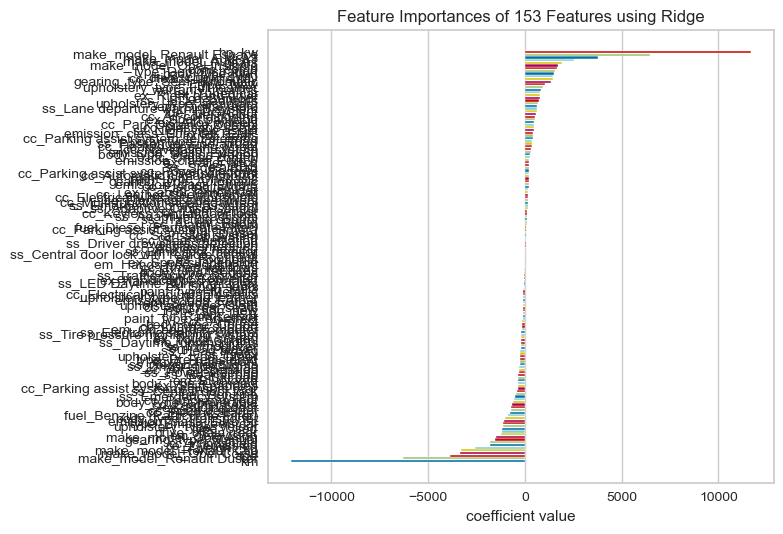

<AxesSubplot:title={'center':'Feature Importances of 153 Features using Ridge'}, xlabel='coefficient value'>

In [142]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [143]:
pipe_lassocv["lassocv"].alpha_

0.85

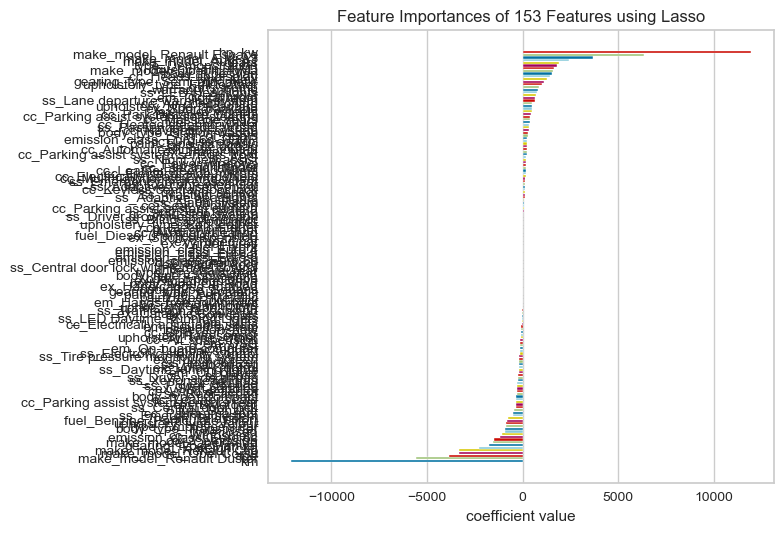

<AxesSubplot:title={'center':'Feature Importances of 153 Features using Lasso'}, xlabel='coefficient value'>

In [144]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

In [145]:
viz.estimator.alpha

0.85

In [146]:
viz.estimator.l1_ratio

1.0

In [147]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}').head(10)

,Coefficient_Viz_Lasso(alpha=0.85)
km,-12123.018945
hp_kw,11938.819474
make_model_Renault Espace,6348.653625
make_model_Renault Duster,-5584.308573
age,-3855.957963
make_model_Audi A3,3664.103540
make_model_Opel Corsa,-3334.229988
make_model_Renault Clio,-3313.101555
make_model_Audi A1,2431.463172
weight_kg,-2306.774138


In [148]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False).head(31)

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8500000000000001, 'elastic__l1_ratio': 1.0}"
intercept,18517.528732
km,-12123.018945
hp_kw,11938.819474
make_model_Renault Espace,6348.653625
make_model_Renault Duster,-5584.308573
age,-3855.957963
make_model_Audi A3,3664.103540
make_model_Opel Corsa,-3334.229988
make_model_Renault Clio,-3313.101555
make_model_Audi A1,2431.463172


# 8. Final Model

In [149]:
df.shape

(15481, 25)

In [150]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'type', 'inspection_new',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'fuel', 'co_2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'gears', 'age', 'hp_kw', 'warranty_months',
       'upholstery_type', 'cons_comb'],
      dtype='object')

In [151]:
df_final = df[["hp_kw", "km", "make_model", "age", "gearing_type", 'weight_kg', 'type', "gears", "price"]]
df_final

,hp_kw,km,make_model,age,gearing_type,weight_kg,type,gears,price
0,66.000000,56013.000000,Audi A1,3.000000,Automatic,1220.000000,Used,5.000000,15770
1,141.000000,80000.000000,Audi A1,2.000000,Automatic,1255.000000,Used,7.000000,14500
2,85.000000,83450.000000,Audi A1,3.000000,Automatic,1250.000000,Used,5.000000,14640
3,66.000000,73000.000000,Audi A1,3.000000,Automatic,1195.000000,Used,6.000000,14500
4,66.000000,16200.000000,Audi A1,3.000000,Automatic,1195.000000,Used,5.000000,16790
...,...,...,...,...,...,...,...,...,...
15896,147.000000,10.000000,Renault Espace,2.000000,Automatic,1758.000000,New,6.000000,39950
15897,165.000000,9900.000000,Renault Espace,0.000000,Automatic,1708.000000,Used,7.000000,39885
15898,146.000000,15.000000,Renault Espace,0.000000,Automatic,1734.000000,Pre-registered,6.000000,39875
15899,147.000000,10.000000,Renault Espace,0.000000,Automatic,1758.000000,Pre-registered,6.000000,39700


In [152]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [154]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [155]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,12384.000000,0.168766,0.374560,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,12384.000000,0.195817,0.396844,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,12384.000000,0.153020,0.360021,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,12384.000000,0.141231,0.348273,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,12384.000000,0.160045,0.366663,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Clio,12384.000000,0.116764,0.321151,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Duster,12384.000000,0.002019,0.044887,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Espace,12384.000000,0.062339,0.241779,0.000000,0.000000,0.000000,0.000000,1.000000
gearing_type_Automatic,12384.000000,0.450097,0.497524,0.000000,0.000000,0.000000,1.000000,1.000000
gearing_type_Manual,12384.000000,0.524790,0.499405,0.000000,0.000000,1.000000,1.000000,1.000000


In [156]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,3097.000000,0.166936,0.372979,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,3097.000000,0.198902,0.399239,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,3097.000000,0.160155,0.366809,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,3097.000000,0.150468,0.357587,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,3097.000000,0.160801,0.367406,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Clio,3097.000000,0.097191,0.296265,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Duster,3097.000000,0.002906,0.053838,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Espace,3097.000000,0.062641,0.242356,0.000000,0.000000,0.000000,0.000000,1.000000
gearing_type_Automatic,3097.000000,0.449467,0.497520,0.000000,0.000000,0.000000,1.000000,1.000000
gearing_type_Manual,3097.000000,0.521795,0.499605,0.000000,0.000000,1.000000,1.000000,1.000000


## Final Scores-Metrics

In [157]:
scaler = MinMaxScaler()
lasso = Lasso(
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso)
]) 
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso(random_state=42))])

In [158]:
fs = eval_metric_regression(pipe_final, X_train, y_train, X_test, y_test, "lasso_final")
fs

0          lasso_final                 
     lasso_final_train lasso_final_test
R2            0.876993         0.869413
MAE        1666.707630      1704.747843
MSE     5619969.155737   5951639.248387
RMSE       2370.647413      2439.598174

## Final Cross Validate

In [159]:
scaler = MinMaxScaler()
lasso = Lasso(
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=10
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.250477,0.004999,0.881264,-1651.191672,-5762175.876720,-2400.453265
1,0.390579,0.007000,0.885461,-1637.509623,-5209304.754590,-2282.390141
2,0.227949,0.005999,0.868580,-1731.622968,-6534355.523358,-2556.238550
3,0.393665,0.005001,0.879464,-1659.760789,-5266369.513617,-2294.857188
4,0.147917,0.005552,0.878258,-1637.709920,-5211397.250450,-2282.848495
5,0.133550,0.005995,0.868361,-1670.138892,-5707529.293079,-2389.043594
6,0.121797,0.009179,0.875044,-1650.400160,-5144410.044972,-2268.129195
7,0.128316,0.004675,0.873310,-1732.498381,-6073856.067187,-2464.519439
8,0.132353,0.005495,0.874406,-1722.318177,-6318404.999049,-2513.643769
9,0.136109,0.004722,0.878899,-1605.893030,-5246376.309578,-2290.496957


In [160]:
df_scores.iloc[:, 2:].mean()

test_r2                                   0.876305
test_neg_mean_absolute_error          -1669.904361
test_neg_mean_squared_error        -5647417.963260
test_neg_root_mean_squared_error      -2374.262059
dtype: float64

In [161]:
fs

0          lasso_final                 
     lasso_final_train lasso_final_test
R2            0.876993         0.869413
MAE        1666.707630      1704.747843
MSE     5619969.155737   5951639.248387
RMSE       2370.647413      2439.598174

## GridSearchCV Final Model

In [162]:
scaler = MinMaxScaler()
lasso = Lasso(
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso)
])
param_grid = {
    "lasso__alpha":np.linspace(0.1, 0.2, 6)
}
grid_model_final = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10
)
# grid_model_final.get_params().keys()

In [163]:
grid_model_final.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             param_grid={'lasso__alpha': array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ])},
             scoring='neg_root_mean_squared_error')

In [164]:
grid_model_final.best_params_

{'lasso__alpha': 0.14}

In [165]:
grid_model_final.best_score_

-2374.0368281773744

In [166]:
gm_final = eval_metric_regression(grid_model_final, X_train, y_train, X_test, y_test, "lasso_grid_final")
gm_final

0          lasso_grid_final                      
     lasso_grid_final_train lasso_grid_final_test
R2                 0.877016              0.869467
MAE             1668.003817           1705.450030
MSE          5618915.436667        5949199.104470
RMSE            2370.425159           2439.098010

In [167]:
df_scores = pd.concat([ls, rs, rcs, lss, lcs, es, gm, gm_final], axis = 1)
df_scores

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.902355       0.896640       0.902318       0.896665   
MAE     1506.249879    1546.557636    1505.403290    1545.728690   
MSE  4461209.120357 4710739.457459 4462898.067414 4709610.252464   
RMSE    2112.157456    2170.423797    2112.557234    2170.163646   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.902321       0.896666       0.902068       0.896491   
MAE     1505.429209    1545.746849    1506.050252    1545.544592   
MSE  4462750.993415 4709575.337411 4474327.385556 4717551.745292   
RMSE    2112.522424    2170.155602    2115.260595    2171.992575   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.902129       0.896549        0.643890        0.638000   
MAE     1505.956782    1545.341943     3035.372454     3043.499446   
MSE  4471556.155599 4714898.657218 16270018.427420 16498570.523804   
RMSE    2114.605437    2171.381739     4033.611090     4061.843242   

0          elastic_grid                         lasso_grid_final  \
     elastic_grid_train elastic_grid_test lasso_grid_final_train   
R2             0.902129          0.896549               0.877016   
MAE         1505.956782       1545.341943            1668.003817   
MSE      4471556.155599    4714898.657218         5618915.436667   
RMSE        2114.605437       2171.381739            2370.425159   

0                           
     lasso_grid_final_test  
R2                0.869467  
MAE            1705.450030  
MSE         5949199.104470  
RMSE           2439.098010

In [168]:
lgm_df_final = get_coeff_intercept(
    grid_model_final.best_estimator_['lasso'].coef_, 
    grid_model_final.best_estimator_['lasso'].intercept_, 
    model_name=f'lasso_grid_final_{grid_model_final.best_params_}',
    columns=X_train.columns
)
lgm_df_final

,Coefficient_lasso_grid_final_{'lasso__alpha': 0.14}
make_model_Audi A1,1830.174626
make_model_Audi A3,3088.744936
make_model_Opel Astra,-1909.276220
make_model_Opel Corsa,-4195.940751
make_model_Opel Insignia,1699.638991
make_model_Renault Clio,-3679.685008
make_model_Renault Duster,-6174.762586
make_model_Renault Espace,8476.158884
gearing_type_Automatic,1167.172816
gearing_type_Manual,-845.378211


In [169]:
2945/df_final['price'].mean()

0.16756751521784177

# 8. Visually Compare Models Performance In a Graph

## 7. Visually Compare Models Scores

In [170]:
scores = df_scores.T.droplevel(0)
scores = scores[scores.index.map(lambda x: 'test' in x)]

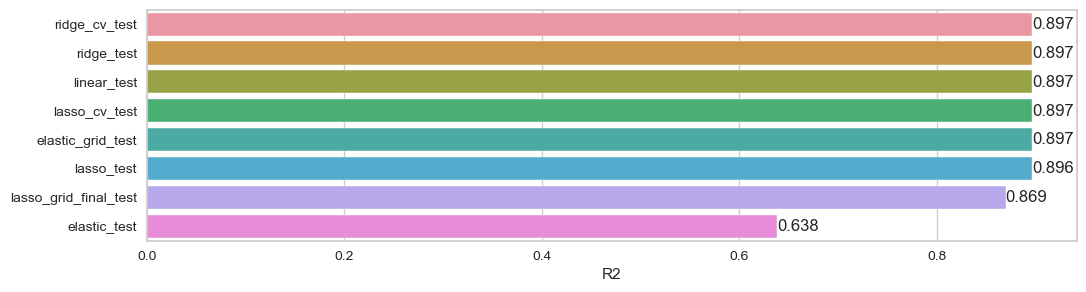

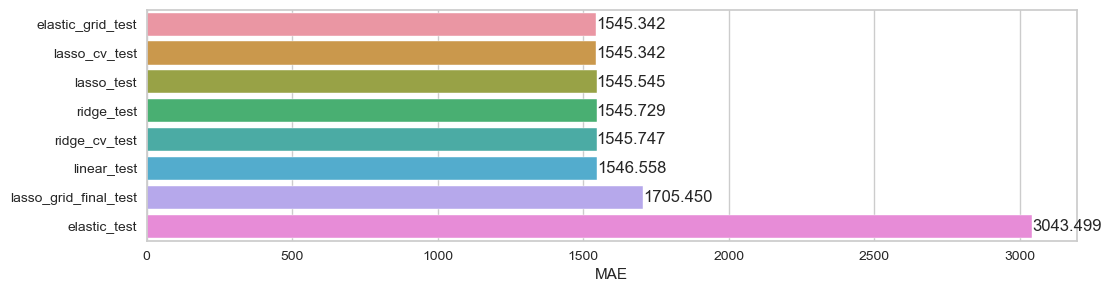

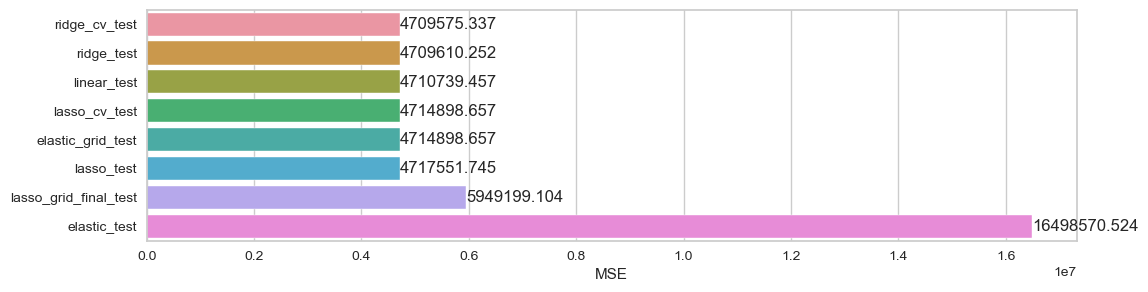

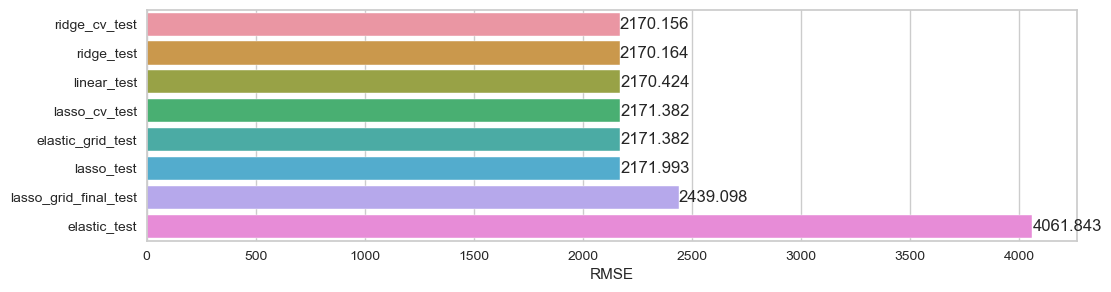

In [171]:
#metrics = scores.columns
for i, j in enumerate(scores):
    ascending = False if (j=="R2") else True
    compare = scores.sort_values(by=j, ascending=ascending)
    
    plt.figure(i, figsize=(12,3))
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.3f");

# Prediction new observation - `with Pipeline`

In [172]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [173]:
X.head(2)

,hp_kw,km,make_model,age,gearing_type,weight_kg,type,gears
0,66.000000,56013.000000,Audi A1,3.000000,Automatic,1220.000000,Used,5.000000
1,141.000000,80000.000000,Audi A1,2.000000,Automatic,1255.000000,Used,7.000000


In [174]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type', 'type']

In [175]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso())
])
pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'gearing_type',
                                                   'type'])])),
                ('Lasso', Lasso())])

In [177]:
df_final.mean()

hp_kw          87.033783
km          33012.089368
age             1.441993
weight_kg    1341.180415
gears           5.879142
price       17575.005491
dtype: float64

In [178]:
df_final.mode().T

,0
hp_kw,85.000000
km,10.000000
make_model,Audi A3
age,1.000000
gearing_type,Manual
weight_kg,1163.000000
type,Used
gears,6.000000
price,14990


In [179]:
my_dict = {
    "hp_kw": 85,
    "km": 17000,
    "make_model": 'Audi A3',
    "age": 1,
    "gearing_type": "Automatic",
    "weight_kg": 1341,
    "type": "Used",
    "gears": 7,
}

In [180]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kw,km,make_model,age,gearing_type,weight_kg,type,gears
0,85,17000,Audi A3,1,Automatic,1341,Used,7


In [181]:
pipe_model.predict(new_obs)

array([22808.73736447])

## Cross Validate With Pipeline

In [182]:
X = df_final.drop(columns=["price"])
y = df_final[["price"]]

In [183]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type', 'type']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [185]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso())
])
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'gearing_type',
                                                   'type'])])),
                ('lasso', Lasso())])

In [186]:
eval_metric_regression(pipe_model, X_train, y_train, X_test, y_test, "lasso")

0             lasso               
        lasso_train     lasso_test
R2         0.876993       0.869413
MAE     1666.707630    1704.747843
MSE  5619969.155737 5951639.248387
RMSE    2370.647413    2439.598174

In [187]:
pipe_model.predict(new_obs)

array([22788.94861102])

In [188]:
model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso(random_state=random_state))
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=10
)
scores = pd.DataFrame.from_dict(scores, orient='columns')
scores.iloc[:,2:].mean()

test_r2                                   0.876305
test_neg_mean_absolute_error          -1669.904361
test_neg_mean_squared_error        -5647417.963260
test_neg_root_mean_squared_error      -2374.262059
dtype: float64

## **`Result:________`**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___